In [2]:
import json
import h5netcdf
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle("catalog.helios.public.20100101-20160101.pkl")
df = df.replace(to_replace="nan", value=np.NaN)

In [4]:
df

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI,TBL_DAYTIME,...,GWN_CLOUDINESS,GWN_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,PSU_CLOUDINESS,PSU_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI,SXF_CLOUDINESS,SXF_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0,0.0,night,-4.100000,0,...,night,-7.500000,0,0.0,night,-1.500000,0,0.000000,night,-3.800000
2010-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,0,0.0,night,-4.100000,0,...,night,-7.493333,0,0.0,night,-1.446667,0,0.000000,night,-3.893333
2010-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,0,0.0,night,-4.100000,0,...,night,-7.420000,0,0.0,night,-1.766667,0,0.000000,night,-4.166667
2010-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,0,0.0,night,-4.100000,0,...,night,-7.533333,0,0.0,night,-2.033333,0,0.000000,night,-4.040000
2010-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0,0.0,night,-4.100000,0,...,night,-7.586667,0,0.0,night,-2.006667,0,0.000000,night,-4.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 22:45:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,59.0,/project/cq-training-1/project1/data/hdf5v5_16...,59.0,0,0.0,night,-1.926667,1,...,variable,19.566667,0,0.0,night,-1.300000,1,2.972854,cloudy,17.960000
2015-12-31 23:00:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,60.0,/project/cq-training-1/project1/data/hdf5v5_16...,60.0,0,0.0,night,-3.006667,1,...,night,3.666667,0,0.0,night,-1.300000,0,0.000000,night,5.926667
2015-12-31 23:15:00,/project/cq-training-1/project1/data/netcdf/GO...,/project/cq-training-1/project1/data/hdf5v7_8b...,61.0,/project/cq-training-1/project1/data/hdf5v5_16...,61.0,0,0.0,night,-3.380000,1,...,night,-1.946667,0,0.0,night,-1.300000,0,0.000000,night,0.146667


ncdf_path            36619
hdf5_8bit_path          32
hdf5_8bit_offset        32
hdf5_16bit_path         32
hdf5_16bit_offset       32
BND_DAYTIME              0
BND_CLEARSKY_GHI         0
BND_CLOUDINESS           0
BND_GHI                180
TBL_DAYTIME              0
TBL_CLEARSKY_GHI         0
TBL_CLOUDINESS           0
TBL_GHI                514
DRA_DAYTIME              0
DRA_CLEARSKY_GHI         0
DRA_CLOUDINESS           0
DRA_GHI               1258
FPK_DAYTIME              0
FPK_CLEARSKY_GHI         0
FPK_CLOUDINESS           0
FPK_GHI                567
GWN_DAYTIME              0
GWN_CLEARSKY_GHI         0
GWN_CLOUDINESS           0
GWN_GHI               2575
PSU_DAYTIME              0
PSU_CLEARSKY_GHI         0
PSU_CLOUDINESS           0
PSU_GHI                228
SXF_DAYTIME              0
SXF_CLEARSKY_GHI         0
SXF_CLOUDINESS           0
SXF_GHI                763
dtype: int64


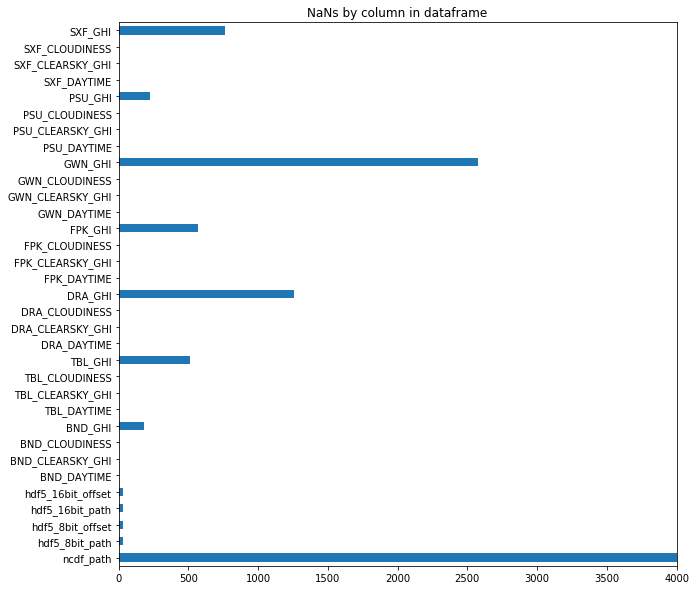

In [5]:
# How many nans by column
missing = df.isna().sum()
print(missing)
missing.plot(kind="barh", title="NaNs by column in dataframe", xlim=(0,4000), figsize=(10,10))
plt.show()

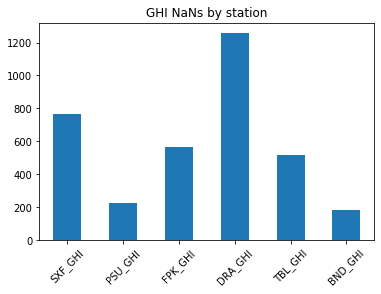

In [6]:
# How many GHI NaNs by station
stations = ["SXF", "PSU", "FPK", "DRA", "TBL", "BND"]
suffix = "_GHI"
stat_ghi = [station + suffix for station in stations]

missing[stat_ghi].plot(kind="bar", title="GHI NaNs by station")
plt.xticks(rotation=45)
plt.show()

In [7]:
# How many night and daytime per station
day ="_DAYTIME"
stat_daytime = [station + day for station in stations]

def count_days(dataframe, stations):
    for station in stations:
        stat = station.split("_")[0]
        nightime = len(dataframe[dataframe[station]==0])
        daylight = len(dataframe[dataframe[station]==1])
        perc_night = round( (nightime / (daylight + nightime)), 3) * 100
        perc_day = round( (daylight / (daylight + nightime)), 3) * 100
        print(f"There are {daylight} records of daylight ({perc_day}%) and {nightime} records of nightime ({perc_night}%) at the station {stat}")


In [8]:
count_days(df, stat_daytime)

There are 107011 records of daylight (50.9%) and 103325 records of nightime (49.1%) at the station SXF
There are 106774 records of daylight (50.8%) and 103562 records of nightime (49.2%) at the station PSU
There are 107160 records of daylight (50.9%) and 103176 records of nightime (49.1%) at the station FPK
There are 106791 records of daylight (50.8%) and 103545 records of nightime (49.2%) at the station DRA
There are 106730 records of daylight (50.7%) and 103606 records of nightime (49.3%) at the station TBL
There are 106730 records of daylight (50.7%) and 103606 records of nightime (49.3%) at the station BND


In [198]:
# Distribution of cloudiness for each station
cloud = "_CLOUDINESS"
stat_cloudy = [station + cloud for station in stations]

def cloud_subplots(dataframe, stations, night=False):
    fig, axs = plt.subplots(nrows=len(stations), figsize=(10, 30))
    for idx, station in enumerate(stations):
        stat = station.split("_")[0]
        group = df.groupby(station).count()[["SXF_DAYTIME"]]
        if night == False:
            axs[idx].bar(group.index.drop("night"), np.delete(np.ndarray.flatten(group.values), 2), color="black")
            axs[idx].set_title(f"Distribution of cloudiness flag for station {stat}")
        else:
            axs[idx].bar(group.index, np.ndarray.flatten(group.values), color="black")
            axs[idx].set_title(f"Distribution of cloudiness flag for station {stat}")
    
    return plt.show()

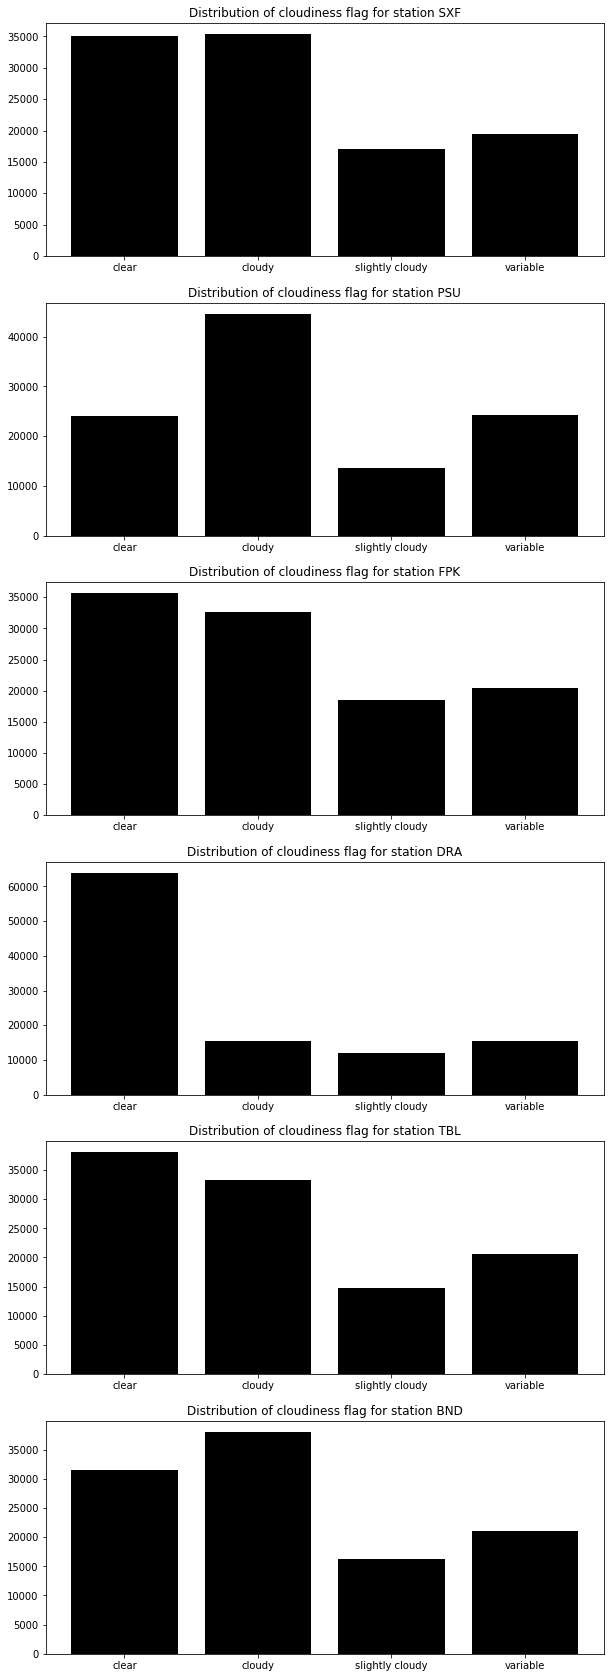

In [202]:
cloud_subplots(df, stat_cloudy, night=False)